<a href="https://colab.research.google.com/github/jaaaamj0711/kaggle_study/blob/master/Netflix/Netflix_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📺 넷플릭스 영화와 티비쇼 분석

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
from collections import Counter
plt.style.use('fivethirtyeight') 

In [2]:
import missingno as msno

In [29]:
data = pd.read_csv("/content/drive/MyDrive/netflix_titles.csv")

### **결측치 확인**

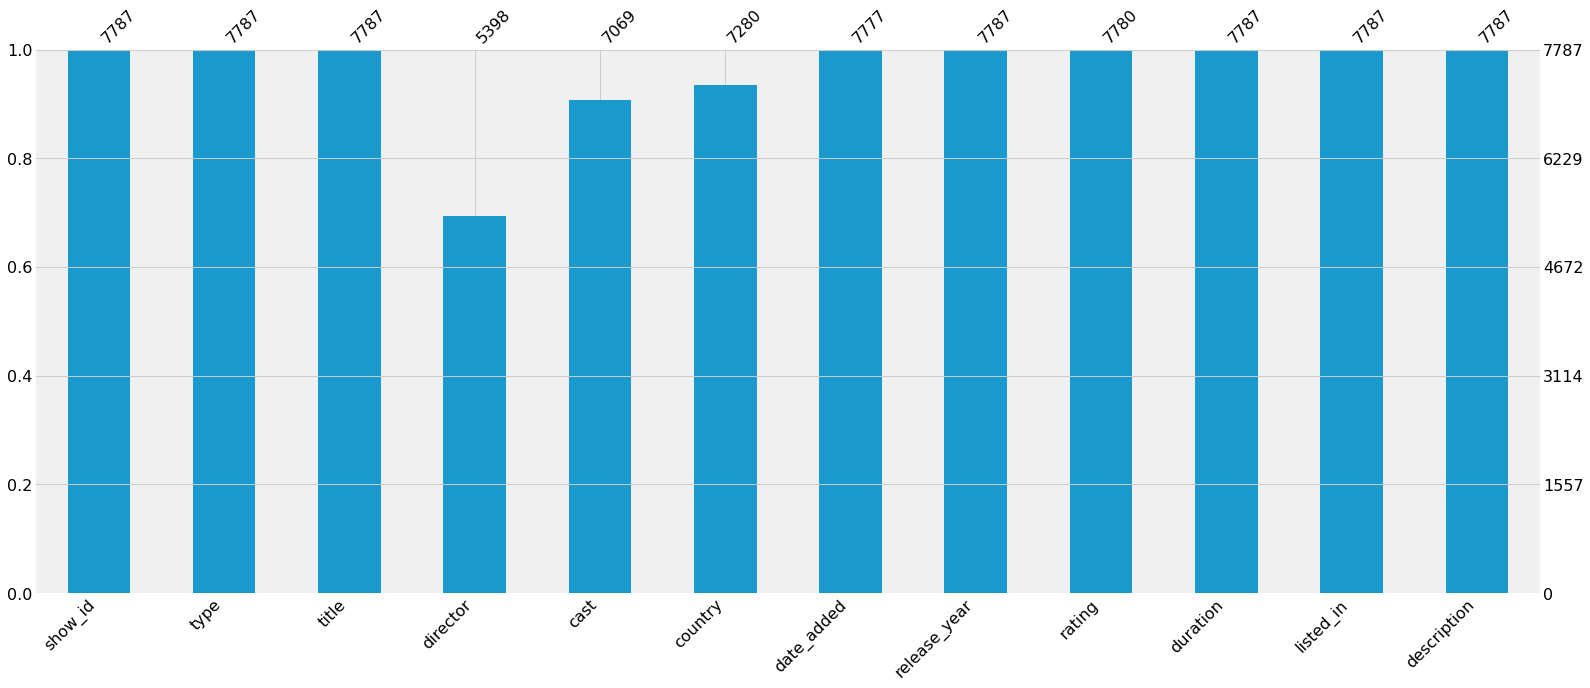

In [4]:
msno.bar(df=data.iloc[:, :], color=(0.1, 0.6, 0.8))

director, country 변수 결측치 확인


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [9]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


# 💻 **분석 결과**

## **`넷플릭스의 TV와 영화의 비율`**




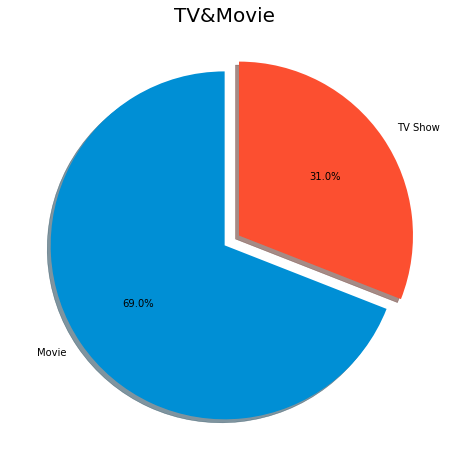

In [35]:
plt.subplots(figsize = (8,8))
plt.pie(data['type'].value_counts(), labels = data['type'].value_counts().index, 
        autopct="%.1f%%", explode = (0, 0.1), shadow = True, startangle = 90)
plt.title('TV&Movie', size=20)
plt.show()

넷플릭스에는 TV Show 비율보다 영화의 비율이 더 많았습니다.

## **`넷플릭스 Top 10 국가`**









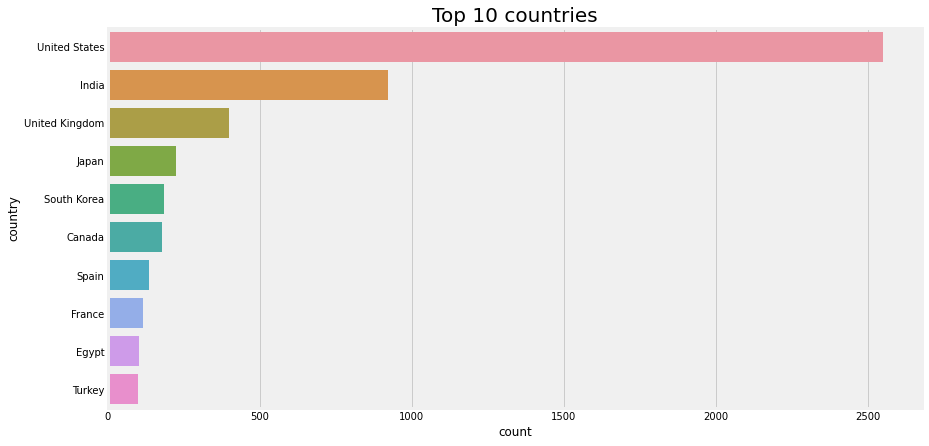

In [36]:
plt.subplots(figsize = (13,7))
sns.countplot(y='country', data=data, order=data['country'].value_counts().index[:10])
plt.title('Top 10 countries', fontsize = 20)
plt.show()

넷플릭스에 있는 제작 국가들을 살펴보니 미국이 가장 많다는 결과가 나왔습니다.

## **`넷플릭스 영화 Top 10 나라 VS 넷플릭스 티비 쇼 Top 10 나라`**

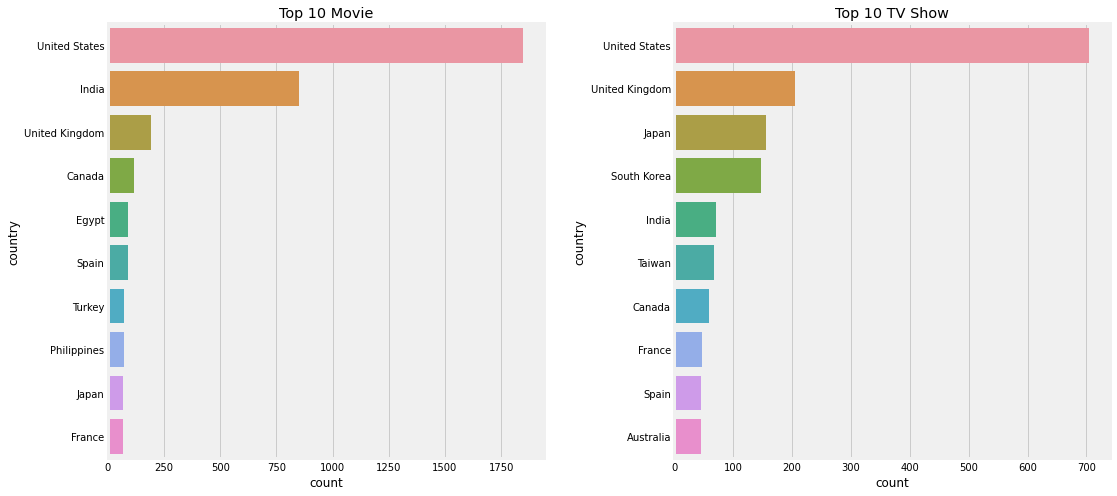

In [37]:
fig, ax = plt.subplots(1,2, figsize=(16,8))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

sns.countplot(y='country', data=data[data['type'] == 'Movie'], order=data[data['type'] == 'Movie']['country'].value_counts().index[:10], ax = ax[0])
ax[0].set_title("Top 10 Movie")

sns.countplot(y='country', data=data[data['type'] == 'TV Show'], order=data[data['type'] == 'TV Show']['country'].value_counts().index[:10], ax = ax[1])
ax[1].set_title("Top 10 TV Show")

plt.show()

영화와 티비쇼를 따로 그려보니 약간의 차이가 있었습니다. 특히 티비쇼에서 우리나라는 4위를 차지하였습니다.

## **`넷플릭스 연도별 제작 수`**

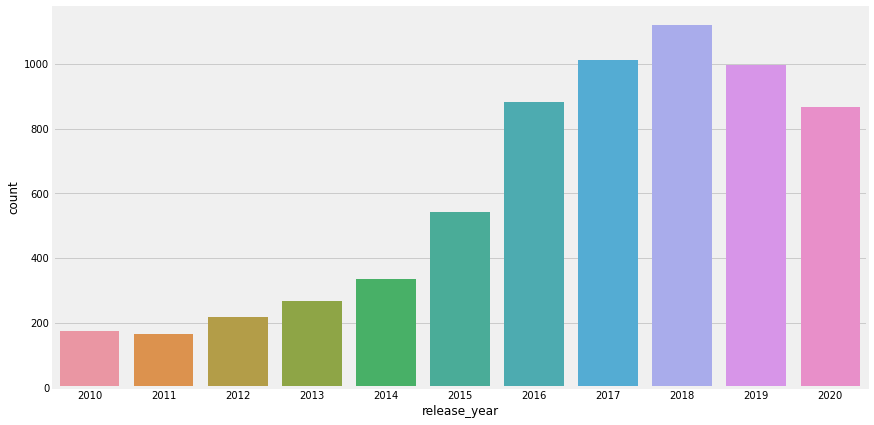

In [12]:
plt.subplots(figsize = (13,7))
sns.countplot(x='release_year', data = data, order = data['release_year'].value_counts().sort_index().index[61:-1])

넷플릭스는 점점 많은 영화와 티비쇼를 제작하고 있습니다. 특히 2018에 제작 수가 가장 많았습니다.

## **`넷플릭스와 영화와 TV의 연령대`**

데이터에서는 TV-PG, TV-MA처럼 연령대를 알아보기 어려운 형태로 되어있습니다. 따라서 다음과 같이 숫자로 보기 쉽게 바꿔주는 작업이 필요합니다.

In [25]:
rating_mean = { 'TV-PG': 7,'TV-MA': 18,'TV-Y7-FV': 7,'TV-Y7': 7,
            'TV-14': 16,'R': 18,'TV-Y': 0,'NR': 18,'PG-13': 13,
            'TV-G': 0,'PG': 7,'G': 0,'UR': 18,'NC-17': 18}

rating = pd.Series(rating_mean, name='age')
rating

TV-PG        7
TV-MA       18
TV-Y7-FV     7
TV-Y7        7
TV-14       16
R           18
TV-Y         0
NR          18
PG-13       13
TV-G         0
PG           7
G            0
UR          18
NC-17       18
Name: age, dtype: int64

In [ ]:
data = pd.merge(data, rating, left_on='rating', right_index=True)
data

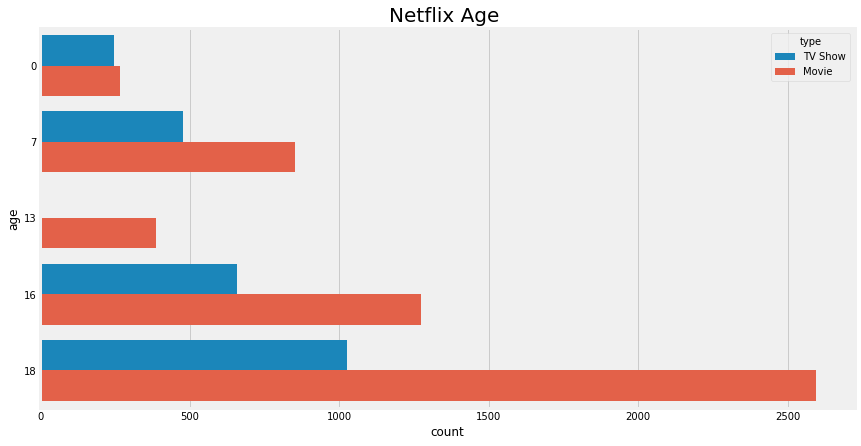

In [50]:
plt.subplots(figsize = (13,7))
sns.countplot(y='age', data=data, hue='type')
plt.title('Netflix Age ', fontsize = 20)
plt.show()

넷플릭스의 영화와 티비의 연령대를 살펴본 결과 18세 이상의 영화가 가장 많다는 결과가 나왔습니다. 주로 16세 이상인 작품들이 많았습니다. 

## **`넷플릭스 영화 상영 시간`**

In [45]:
data[data['type']=='TV Show']['duration'].value_counts()

1 Season      1606
2 Seasons      382
3 Seasons      184
4 Seasons       87
5 Seasons       58
6 Seasons       30
7 Seasons       19
8 Seasons       18
9 Seasons        8
10 Seasons       6
11 Seasons       3
12 Seasons       2
15 Seasons       2
13 Seasons       2
16 Seasons       1
Name: duration, dtype: int64

In [46]:
data[data['type']=='Movie']['duration'].value_counts()

90 min     136
93 min     131
91 min     125
94 min     125
95 min     119
          ... 
16 min       1
214 min      1
196 min      1
228 min      1
182 min      1
Name: duration, Length: 201, dtype: int64

상영시간은 티비쇼는 시즌1, 시즌2로 되어있고 영화는 시간으로 표현되어 있습니다. 시간을 분석해 보기 위해 영화만 따로 보도록 하겠습니다.

In [47]:
data['duration'] = data['duration'].apply(lambda x: x.split(' ')).str[0]
data['duration'] = data['duration'].astype(float)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


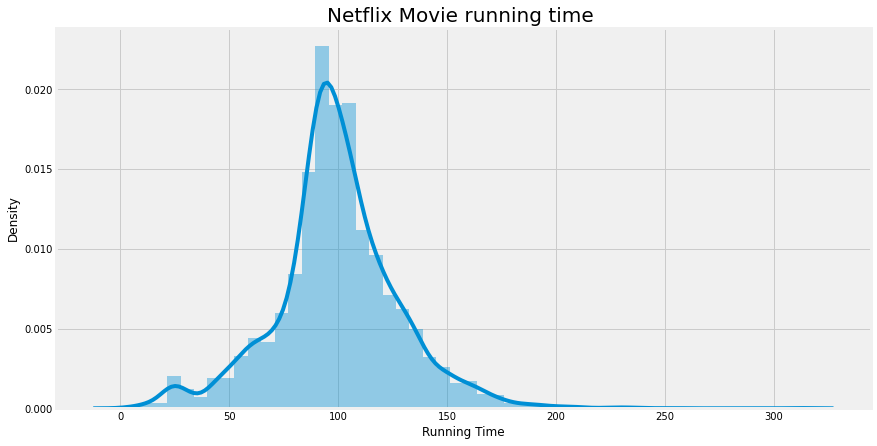

In [52]:
plt.subplots(figsize = (13,7))
sns.distplot(data[data['type']=="Movie"]['duration'])
plt.title('Netflix Movie running time ', fontsize = 20)
plt.xlabel("Running Time")
plt.show()

영화 상영시간은 약 100분 즉 1시간 40분을 기준으로 그 근처에 많이 있다는 결과가 나왔습니다. 

## **`넷플릭스 장르`**

In [91]:
data['listed_in'].head()

0    International TV Shows, TV Dramas, TV Sci-Fi &...
1                         Dramas, International Movies
5      International TV Shows, TV Dramas, TV Mysteries
6                  Horror Movies, International Movies
9       Horror Movies, International Movies, Thrillers
Name: listed_in, dtype: object

장르는 다음과 같이 여러 장르들이 들어가 있습니다. 따라서 각각 셀수 있도록 변경하여야 합니다. 그 작업은 아래와 같습니다.

In [75]:
genre =list(data['listed_in'])

genres=[]

for i in genre:
    a = list(i.split(','))
    for j in a:
        genres.append(j.replace(' ',""))

genres_df = Counter(genres)

In [76]:
genres_df = pd.DataFrame.from_records(genres_df.most_common(), columns=['Genre','count'])
genres_df.head()

,Genre,count
0,InternationalMovies,2437
1,Dramas,2105
2,Comedies,1471
3,InternationalTVShows,1198
4,Documentaries,786


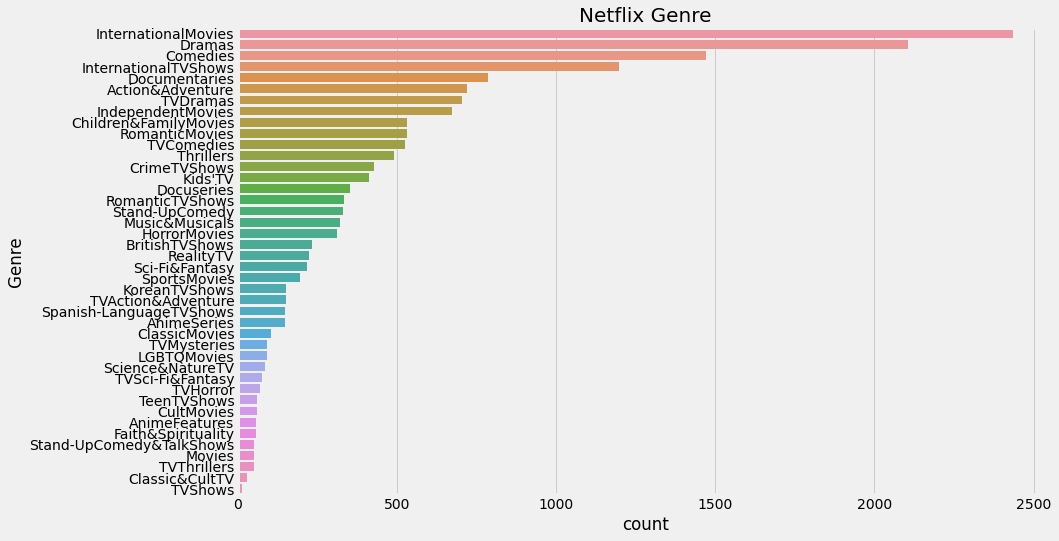

In [93]:
plt.subplots(figsize = (13,8))
sns.barplot(y=genres_df['Genre'], x=genres_df['count'], data=genres_df)
plt.title("Netflix Genre", fontsize = 20)
plt.show()

장르를 분석해본 결과 InternationalMovies, Dramas International TV Shows 등의 순으로 많았습니다.